# Identify exposures to go into COSMOS coadds

In [2]:
import sys
sys.path.append('../scripts')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from skipper import observe
import sigjson_s2022a

In [4]:
_, oiii_pointings = sigjson_s2022a.load_mastercat ()

In [5]:
coo = observe.CopilotOutput ( '../../DataLogs/db_merian.fits', oiii_pointings, skySB_0=22.1 )

In [9]:
in_cosmos = coo.merian_sidecar.apply(lambda x: 'COSMOS' in x['object'], axis=1 )

In [44]:
relevant_columns = ['filename','exptime','expnum','mjd_obs','airmass','racenter','deccenter',
                    'rabore','decbore','band','zeropoint','transparency','seeing','sky',
                    'dx','dy','object','t_eff']

In [45]:
# \\ all COSMOS OIII pointings, except the t_eff < 300s exposure(s)
oiii_cosmos = coo.merian_sidecar.loc[in_cosmos].query('t_eff>300.')
assert oiii_cosmos.shape[0] == 40
# \\ DEEP : all pointings
deep = oiii_cosmos[relevant_columns]
# \\ BEST : 4 highest t_eff
best = oiii_cosmos.sort_values('t_eff', ascending=False).iloc[:4][relevant_columns]
# \\ WIDE : 4 with t_eff closest to median
wide = oiii_cosmos.reindex(abs(oiii_cosmos['t_eff'] - np.median(oiii_cosmos['t_eff'])).sort_values ().index[:4])

In [46]:
for name in ['deep','best','wide']:    
    globals()[name].to_csv(f'~/Downloads/oiii_cosmos_{name}.csv')

In [41]:
from astropy.io import fits

In [42]:
filename = '../../DataLogs/db_merian.fits'
x =  fits.getdata ( filename, 1 )

In [43]:
deep

,filename,exptime,mjd_obs,airmass,racenter,deccenter,rabore,decbore,band,zeropoint,transparency,seeing,sky,dx,dy,object,t_eff
61867,rawdata/DECam_01068555.fits.fz,900.0,59580.281620,1.25,150.044591,2.051177,150.052108,2.126281,N540,25.304220,1.024916,1.579007,22.231764,9.079506,-4.883051,COSMOS_J100012.50+020734.61_N540,428.110875
61868,rawdata/DECam_01068556.fits.fz,900.0,59580.292350,1.22,150.172049,2.054018,150.179567,2.129122,N540,25.263876,0.982902,1.620169,22.244967,17.651405,-11.453580,COSMOS_J100043.09+020744.83_N540,378.555150
61869,rawdata/DECam_01068557.fits.fz,900.0,59580.303098,1.21,150.139424,2.073615,150.146942,2.148719,N540,25.297114,1.011872,1.684763,22.256413,13.012321,-20.031897,COSMOS_J100035.26+020855.38_N540,374.956896
61870,rawdata/DECam_01068558.fits.fz,900.0,59580.313846,1.19,150.188412,2.067175,150.195929,2.142279,N540,25.306625,1.017583,1.616173,22.270364,14.648247,-24.620358,COSMOS_J100047.02+020832.20_N540,417.399781
61871,rawdata/DECam_01068559.fits.fz,900.0,59580.324593,1.18,150.155608,2.047980,150.163125,2.123084,N540,25.270047,0.982333,1.571499,22.266703,14.159254,-28.956390,COSMOS_J100039.15+020723.10_N540,410.027402
61872,rawdata/DECam_01068560.fits.fz,900.0,59580.335338,1.18,150.074141,2.103212,150.081658,2.178316,N540,25.279298,0.990739,1.451771,22.248680,16.250719,-17.692484,COSMOS_J100019.59+021041.93_N540,480.658432
61873,rawdata/DECam_01068561.fits.fz,900.0,59580.346123,1.19,150.123011,2.116905,150.130529,2.192009,N540,25.273162,0.986700,1.528350,21.899872,20.549751,-18.624848,COSMOS_J100031.32+021131.23_N540,311.972289
61878,rawdata/DECam_01068714.fits.fz,900.0,59581.215441,1.59,150.023878,2.081002,150.031396,2.156106,N540,25.292801,1.069646,1.372965,22.153930,1.250196,0.978238,COSMOS_J100007.53+020921.98_N540,574.084572
61879,rawdata/DECam_01068715.fits.fz,900.0,59581.226217,1.51,150.087941,2.041305,150.095458,2.116409,N540,25.284621,1.048403,1.278421,22.171990,15.599895,1.735439,COSMOS_J100022.90+020659.07_N540,646.766062
61880,rawdata/DECam_01068716.fits.fz,900.0,59581.236972,1.43,150.084958,2.054018,150.092475,2.129122,N540,25.286414,1.037064,1.359780,22.188803,27.587036,-21.322108,COSMOS_J100022.19+020744.83_N540,568.116249


(array([7., 7., 6., 1., 2., 5., 3., 6., 1., 2.]),
 array([ 311.97228892,  447.14410951,  582.31593009,  717.48775068,
         852.65957126,  987.83139185, 1123.00321243, 1258.17503302,
        1393.3468536 , 1528.51867419, 1663.69049477]),
 <BarContainer object of 10 artists>)

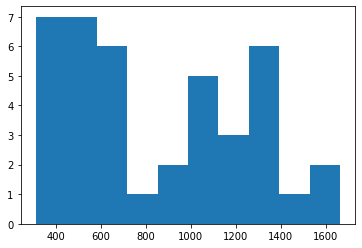

In [39]:
plt.hist(oiii_cosmos['t_eff'] )